## Data Analysis + Visualization

### import sql

In [6]:
import mysql.connector

remote = mysql.connector.connect(
    host = "database-eda.chuw4mu887pw.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = 'root',
    password = 'myung234',
    database = 'eda'
)

cur = remote.cursor(buffered=True)

In [8]:
cur.execute ("Select*From car_accident")
result = cur.fetchall()

### Save in DF

In [13]:
import pandas as pd

data = pd.DataFrame(result, columns=["accident_id", "date", "speed", "age", "sex", "auto_id", "state_id", "weather_id", "road_id", "movement_id", "brand_id", "pavement_id"])
data

,accident_id,date,speed,age,sex,auto_id,state_id,weather_id,road_id,movement_id,brand_id,pavement_id
0,1,2024-10-01,0.0,None,None,0,1,1,0,8,0.0,0
1,2,2024-10-01,0.0,None,None,0,1,0,0,8,0.0,0
2,3,2024-10-01,3.0,None,None,0,1,0,0,2,0.0,0
3,4,2024-10-01,10.0,None,None,0,1,0,0,2,0.0,0
4,5,2024-10-01,0.0,None,None,0,1,0,0,8,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16743,16744,2023-12-27,NaN,None,None,1,1,2,2,8,NaN,1
16744,16745,2023-12-13,NaN,None,None,1,1,0,2,8,NaN,0
16745,16746,2023-12-29,NaN,None,None,1,1,2,2,9,NaN,1
16746,16747,2023-12-28,NaN,None,None,1,1,1,0,3,NaN,0


### Mapping (replace id to name)

In [40]:
brand_mapping = {0: "Waymo", 1: "Tesla", 2: "Cruise", 3: "Transdev Alternative Services", 4: "Zoox", 5: "Toyota Motor", 6: "General Motors", 7: "Lucid USA"}
data["brand_id"] = data["brand_id"].map(brand_mapping)
data

,accident_id,date,speed,age,sex,auto_id,state_id,weather_id,road_id,movement_id,brand_id,pavement_id
0,1,2024-10-01,0.0,None,None,0,1,1,0,8,Waymo,0
1,2,2024-10-01,0.0,None,None,0,1,0,0,8,Waymo,0
2,3,2024-10-01,3.0,None,None,0,1,0,0,2,Waymo,0
3,4,2024-10-01,10.0,None,None,0,1,0,0,2,Waymo,0
4,5,2024-10-01,0.0,None,None,0,1,0,0,8,Waymo,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16743,16744,2023-12-27,NaN,None,None,1,1,2,2,8,NaN,1
16744,16745,2023-12-13,NaN,None,None,1,1,0,2,8,NaN,0
16745,16746,2023-12-29,NaN,None,None,1,1,2,2,9,NaN,1
16746,16747,2023-12-28,NaN,None,None,1,1,1,0,3,NaN,0


## Visualization & Data Analysis

In [15]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

### goes by brand

In [16]:
data["brand_id"].unique()

array([ 0.,  4.,  3.,  2.,  1., nan])

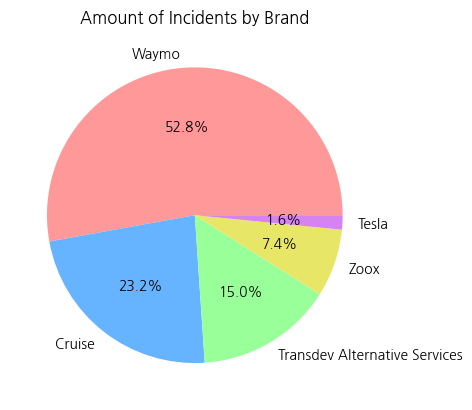

In [44]:
data["brand_id"].value_counts().plot.pie(autopct='%1.1f%%',
                                         colors = ["#ff9999", "#66b3ff", "#99ff99", "#e8e666", "#d683f2"]).set_title("Amount of Incidents by Brand")
plt.ylabel("")

plt.show()

<hr>

# New Data Web Crawling

In [23]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
from user_agent import generate_user_agent

url = "https://www.craftlawfirm.com/autonomous-vehicle-accidents-2019-2024-crash-data/"
req = Request(url=url, headers={'User-Agent': generate_user_agent()})
page = urlopen(req)
soup = BeautifulSoup(page, "html.parser")

print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <link as="image" fetchpriority="high" href="https://www.craftlawfirm.com/wp-content/uploads/2021/08/logo.svg" rel="preload" type="image/svg+xml"/>
  <link as="style" href="https://www.craftlawfirm.com/wp-content/cache/fvm/min/1726766765-css79c1421eb1be4c133449a092be6a720711d579a1b6f745ef394d957276bf9.css" media="all" rel="preload">
   <script data-cfasync="false">
    if(navigator.userAgent.match(/MSIE|Internet Explorer/i)||navigator.userAgent.match(/Trident\/7\..*?rv:11/i)){var href=document.location.href;if(!href.match(/[?&]iebrowser/)){if(href.indexOf("?")==-1){if(href.indexOf("#")==-1){document.location.href=href+"?iebrowser=1"}else{document.location.href=href.replace("#","?iebrowser=1#")}}else{if(href.indexOf("#")==-1){document.location.href=href+"&iebrowser=1"}else{document.location.href=href.replace("#","&iebrowser=1#")}}}}
   </script>
   <script data-cfasync="false">
    class FVMLoader{constructor(e){this

In [54]:
rows = []

tables = soup.find_all(class_="asset")


for table in tables:
    headers = [header.text.strip() for header in table.find_all("th")]
    
    # Found the desired table
    if "Company" in headers:
        #print(table.prettify())

        # Get Each Row
        for row in table.find("tbody").find_all("tr"):
            cols = [col.text.strip() for col in row.find_all("td")]
            rows.append(cols)
        
        df = pd.DataFrame(rows, columns = headers)

df

,Company,Number of Incidents,Type of System
0,"Tesla, Inc.","2,146",ADAS
1,Waymo LLC,415,ADS
2,"General Motors, LLC",219,Both
3,Cruise LLC,187,ADS
4,Transdev Alternative Services,159,ADS
5,Honda (American Honda Motor Co.),155,ADAS
6,"Subaru of America, Inc.",92,ADAS
7,"Zoox, Inc.",75,ADS
8,Toyota Motor Engineering & Manufacturing,63,Both
9,Ford Motor Company,58,Both


<hr>
(Crawling done)

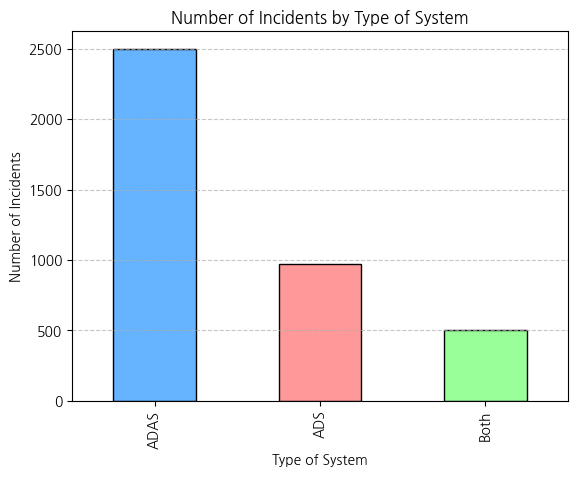

In [ ]:


df["Number of Incidents"] = df["Number of Incidents"].replace({',': ''}, regex=True)
df["Number of Incidents"] = pd.to_numeric(df["Number of Incidents"])

grouped_data = df.groupby("Type of System")["Number of Incidents"].sum()
grouped_data.plot(kind="bar", color=["#66b3ff", "#ff9999", "#99ff99"], edgecolor="black").set_title("Number of Incidents by Type of System")

plt.xlabel("Type of System")
plt.ylabel("Number of Incidents")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<hr>

# New Data Web Crawling

In [74]:
#Web Crawling
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
from user_agent import generate_user_agent

url = "https://www.dmv.ca.gov/portal/vehicle-industry-services/autonomous-vehicles/autonomous-vehicle-collision-reports/"
req = Request(url=url, headers={'User-Agent': generate_user_agent()})
page = urlopen(req)
soup = BeautifulSoup(page, "html.parser")

print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" dir="ltr" lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <script>
   (function(html){html.className = html.className.replace(/\bno-js\b/,'js')})(document.documentElement);
  </script>
  <meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
  <style>
   img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }
  </style>
  <script>
   var dataLayer = dataLayer || [];
		dataLayer.push({"task":"driver safety,educational","funcType":"informational,resource portal","conLang":"en_US"});
  </script>
  <!-- This site is optimized with the Yoast SEO plugin v23.9 - https://yoast.com/wordpress/plugins/seo/ -->
  <title>
   Autonomous Vehicle Collision Reports - California DMV
  </title>
  <meta content="Manufacturers who are testing autonomous vehicles need to report any collision that resulted in propert

In [75]:
data = soup.find_all(class_="wp-block-list")

dict_SF = {year:[] for year in range(2019, 2025)}
for element in data:
    values = element.find_all("a")
    for value in values:
        text = value.text

        for year in dict_SF.keys():
            if str(year) in text:
                dict_SF[year].append(text)


dict_SF = {year: items for year, items in dict_SF.items() if items}

dict_SF

{2019: ['Cruise December 27, 2019',
  'Zoox December 20, 2019',
  'Waymo December 20, 2019',
  'Zoox December 19, 2019',
  'Cruise December 19, 2019',
  'Cruise December 13, 2019',
  'Cruise December 8, 2019',
  'Cruise November 29, 2019',
  'Cruise November 25, 2019',
  'Zoox November 22, 2019',
  'Lyft November 19, 2019',
  'Cruise November 18, 2019',
  'Cruise November 10, 2019',
  'Cruise November 9, 2019',
  'Cruise November 7, 2019 (1)',
  'Cruise November 7, 2019 (2)',
  'Waymo November 4, 2019',
  'Cruise October 29, 2019',
  'Cruise October 28, 2019',
  'Waymo October 28, 2019 (1)',
  'Waymo October 28, 2019 (2)',
  'Cruise October 27, 2019',
  'Cruise October 26, 2019',
  'Waymo October 19, 2019',
  'Waymo October 18, 2019',
  'Cruise October 17, 2019',
  'Waymo October 16, 2019',
  'Waymo October 14, 2019',
  'Zoox October 12, 2019',
  'Cruise October 12, 2019',
  'Zoox October 11, 2019',
  'Waymo October 10, 2019',
  'GM Cruise October 3, 2019',
  'GM Cruise September 27, 2

In [77]:
df_waymo = pd.DataFrame(columns = ["years", "Waymo", "Cruise", "Zoox"])

Waymo_list = []
Cruise_list = []
Zoox_list = []



for value in dict_SF.values():
    waymo_count = 0
    cruise_count = 0
    zoox_count = 0
    for name in value:
        if "Waymo" in name:
            waymo_count+=1
        elif "Cruise" in name:
            cruise_count+=1
        elif "Zoox" in name:
            zoox_count+=1
    Waymo_list.append(waymo_count)
    Cruise_list.append(cruise_count)
    Zoox_list.append(zoox_count)

In [78]:
df_waymo.Waymo = Waymo_list
df_waymo.Cruise = Cruise_list
df_waymo.Zoox = Zoox_list
df_waymo.years = dict_SF.keys()
df_waymo

,years,Waymo,Cruise,Zoox
0,2019,25,61,8
1,2020,11,16,13
2,2021,64,30,9
3,2022,71,33,29
4,2023,50,41,15
5,2024,59,0,25


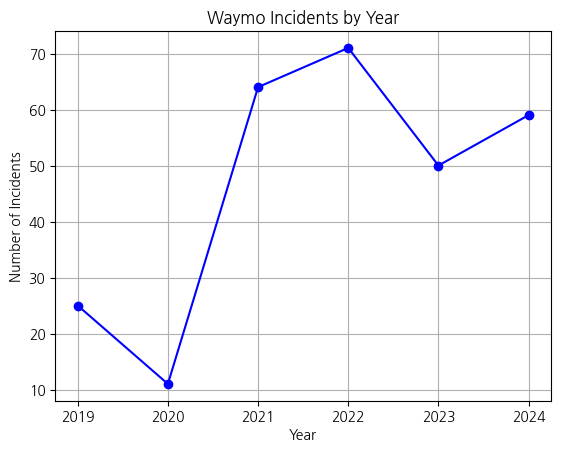

In [81]:
plt.plot(df_waymo["years"], df_waymo["Waymo"], marker='o', color='b', label="Waymo")

# Customize the chart
plt.title("Waymo Incidents by Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(True)